# CS224n: NLP with Deep Learning

# Lecture 6: Language Models and Recurrent Neural Networks

---

## Language Modelling

### Definition

* Language Modelling = Predict what word comes next

Given a sequence of words $x^{(1)}, x^{(2)}, ..., x^{(t)} $  
compute probability distribution of $x^{(t+1)}$:

$$ P(x^{(t+1)} | x^{(t)}, ..., x^{(1)}) $$ 

* $x^{(t+1)}$ can be any word in a predefined vocabulary of words

### n_gram Language Model

* Collect statistics of how often different n-gams occur:  
We just count them in a large corpus of text

$ P(w|students\,opened\,their) = \frac{ count(students\,opened\,their\,w)}{count(students\,opened\,their)} $

#### Problems

##### Sparsity problem 1

* "students opened their $w$" has never occured before  
If a specific n-gram equals 0, it will never be predicted  

Solution  
→ add a small smoothing term $\delta$ to the count of every word, so that they all at least have a small probability

##### Sparsity problem 2

* "students opened their" has never occured before  

Solution: backoff!   

→ Go back to "opened their" to predict the next word

* These sparsity problems get worse and worse with *n* increasing:  
thus, we have to keep $n < 5$

##### Storage problems

* We have to store counts for a lot of different n-grams

### A Neural Language Model

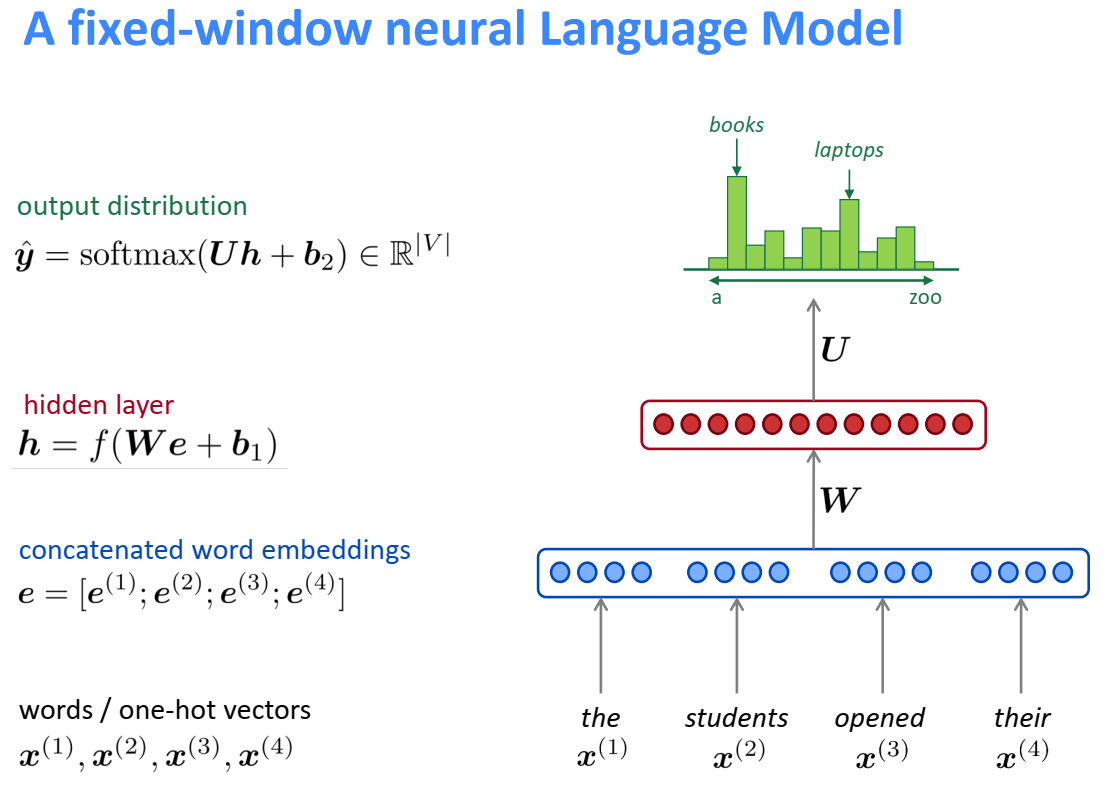

Problem:

* The weights of all the input words are all completely separated from each other:  
we learn the same things 4 times, instead of having each word reinforcing our learning

* There should be a lot of commonality in how we treat our way embeddings:   processing 1st position shouldn't be too different from 3rd position

→ We NEED an architecture that can process **any length input**

---

## Recurrent Neural Networks (RNN)

### Architecture

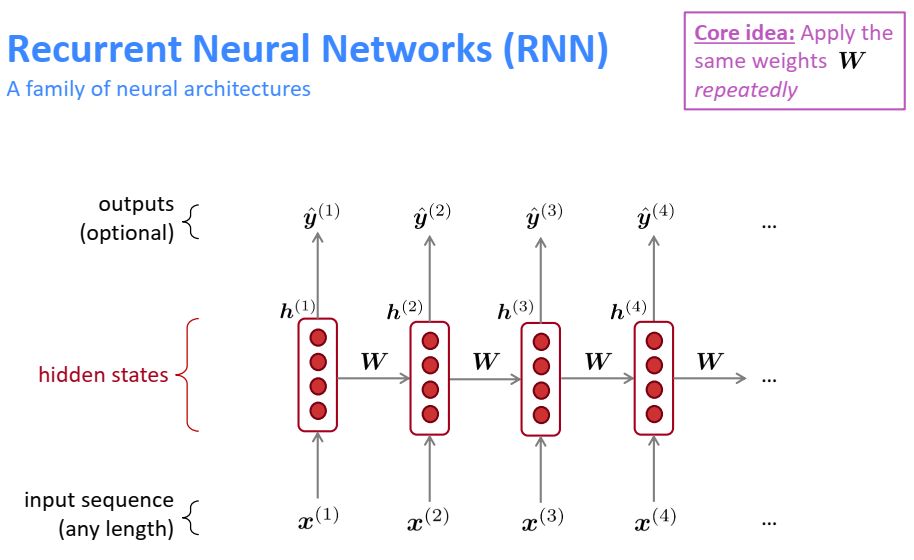

* Each hidden state is computed using both:
    * the previous hidden state
    * the input at that step

* Timestamp = hidden state (synonym)

**Core idea**

* We apply the **same** weights matrix $W$ at every step

* Our outputs $ \hat{y} $ can be optionnally computed, for each step, or for a few steps only (depending on our goal)

* The embeddings could be dowloaded, and then fixed, or also fine-tuned, or also learned from scratch

* We learn both $ W_{e} $ and $ W_{h} $

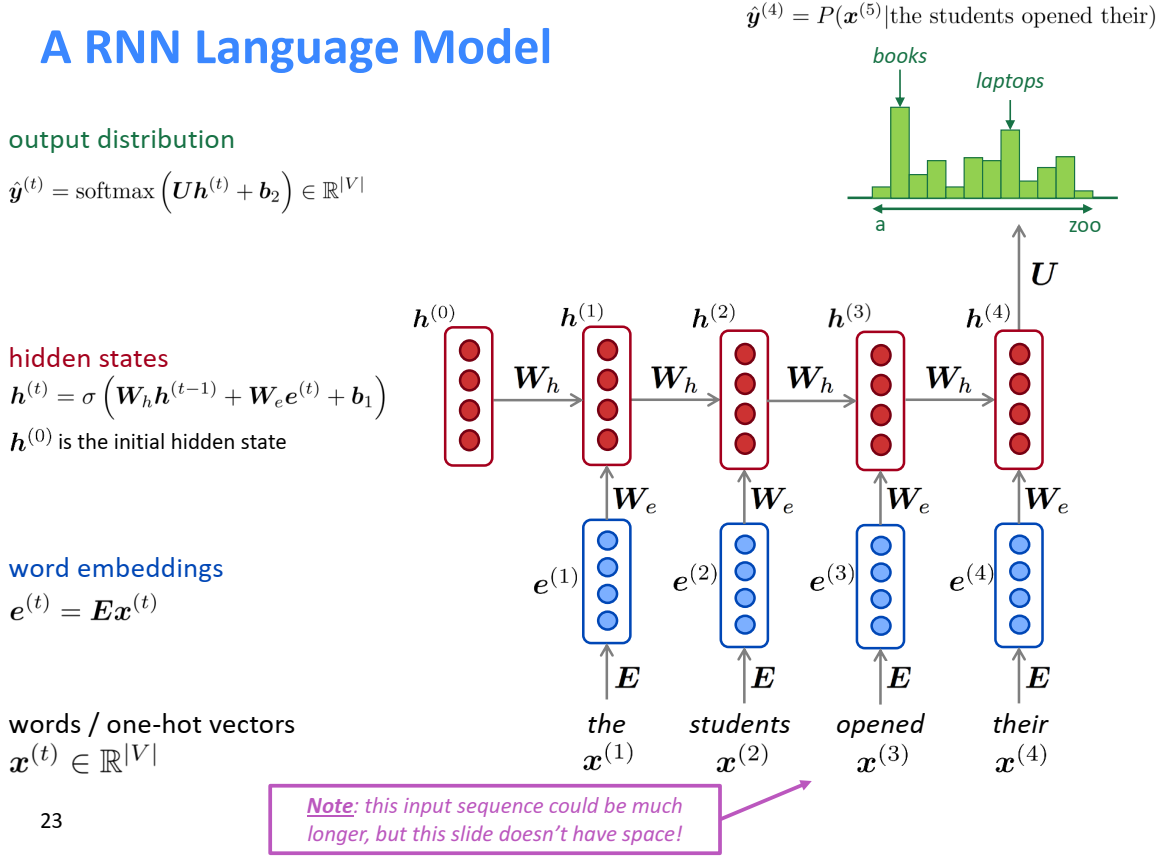

### Advantages

* RNN can process any length of inputs
* When computing step $t$, we are using information from many steps ago
* Model size is fixed (doesn't depend on the size of input)
* The inputs are processed symmetrically, as the same weights are applied at each step

### Disadvantages

* Computation is **slow**, as it is sequential
* In practice, information from many steps back is hard to access

### Training a RNN Language Model

* For every step, compute the output distribution
* Compute the loss function on step $t$:  
Cross-entropy loss between this predicted probability distribution, and the true next word
* Compute the **overall loss** by averaging all these losses, on every word of the training set

**Problem**

Computing loss and gradients on whole corpus is too expensive !

**Solution**

→ Use a shorter sequence: a sentence, or a document for example

* Use **Stochastic Gradient Descent**:  

only compute loss for a few sentences, and then update

#### Backprop

* The gradient with respect to a repeated weight is the sum of the gradient, for each time step it appears

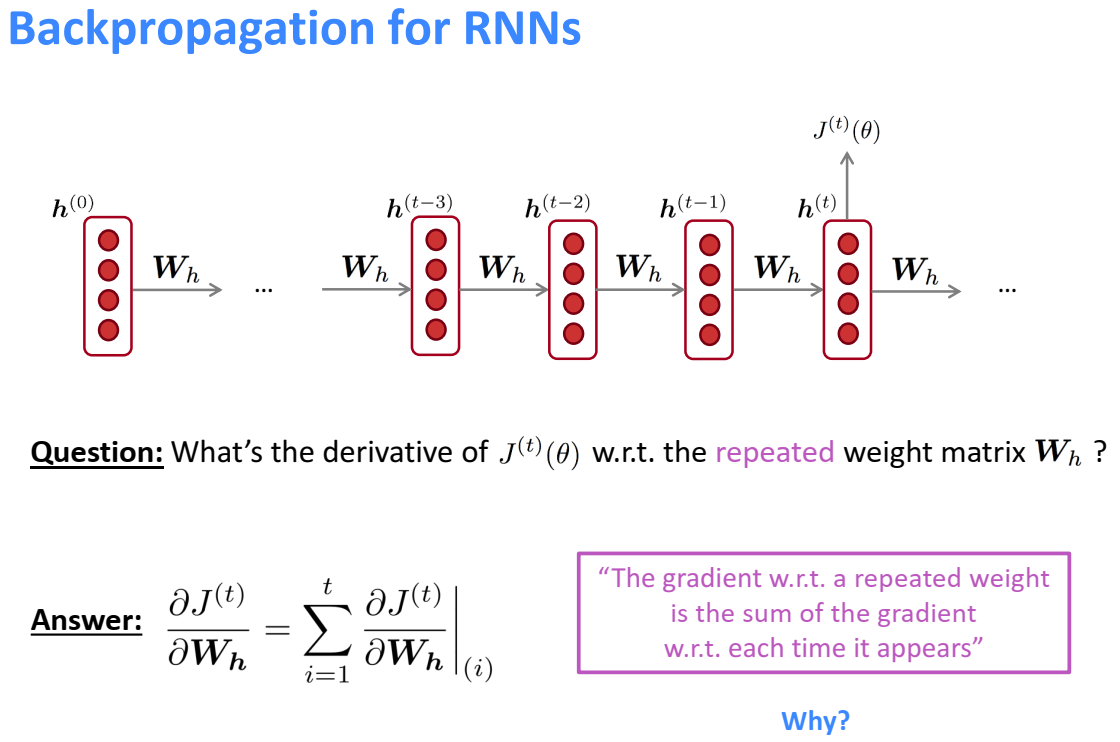

* These gradients should be calculated cumulatively, by using the previous one

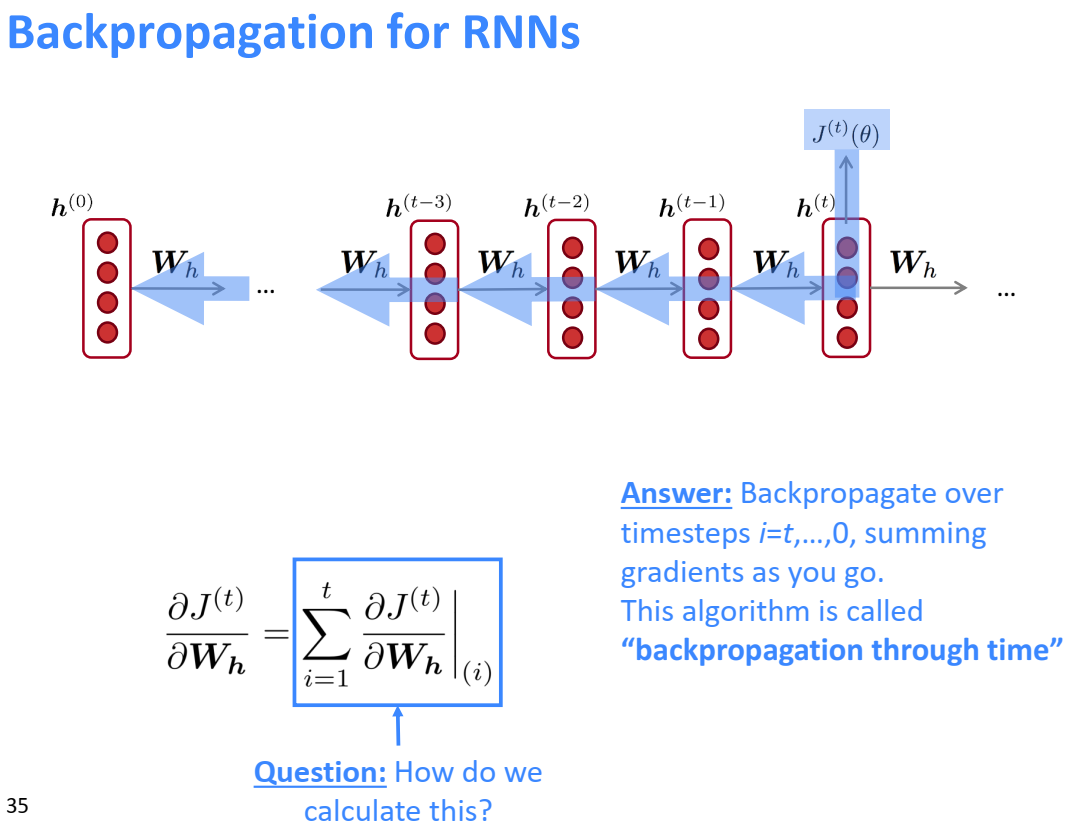

#### Generating text with a RNN

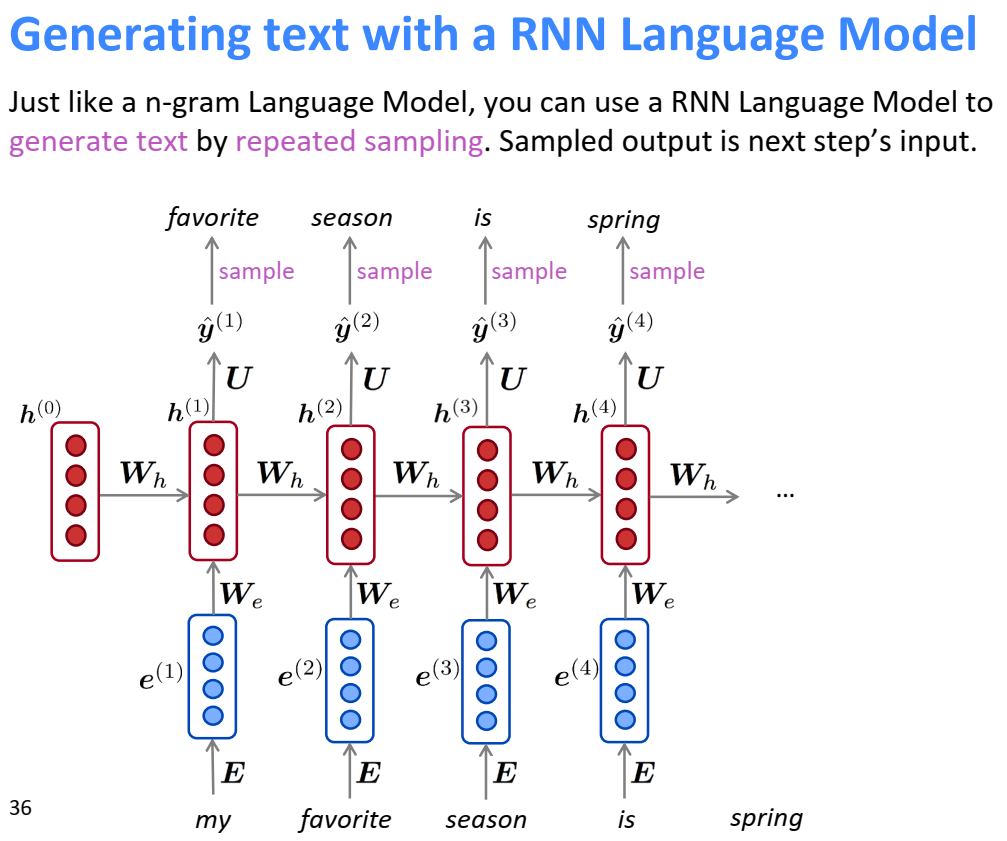

##### A few funny examples

* Obama:  
Solemn tone, but incoherent text

* Harry Potter:  
The tone is well done again, but not too much sense either

* Recipe:  
Inability to remember what's happening overall

/!\\ Warning:  
Need to stay skeptical, as these clickbaity articles have probably been hand-picked by humans for being the funniest ones (or even modified by humans to be funny!)

#### Evaluating Language Models

**Perplexity**

* Inverse probability of corpus, according to our Language Model
* We have to normalize it by the number of words, as otherwise the Perplexity would grow larger and larger with the corpus size

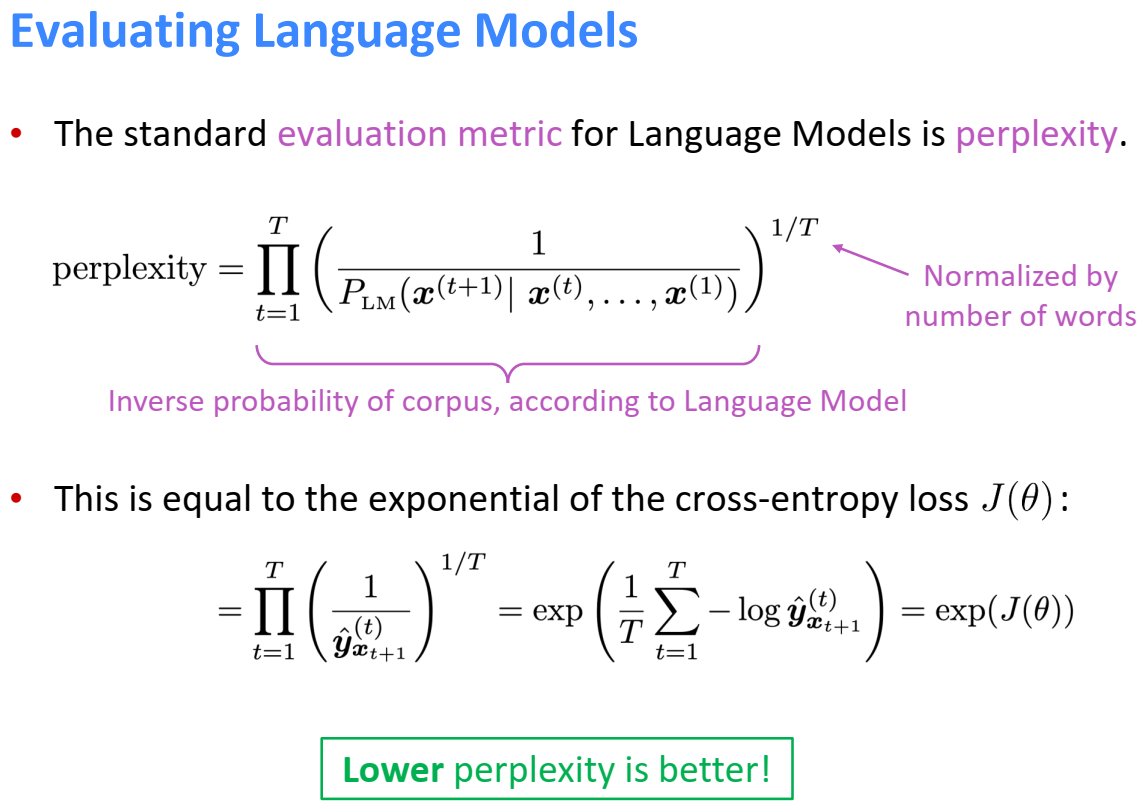

$ Perplexity = \frac{1}{P(corpus)} $

---

### Importance of Language Modelling

* Language Modelling is a benchmark task, which is used to measure our automatic understanding of language

* Language Modelling is a subcomponent of many NLP tasks:
    * Generating text
    * Estimating probability of text
    

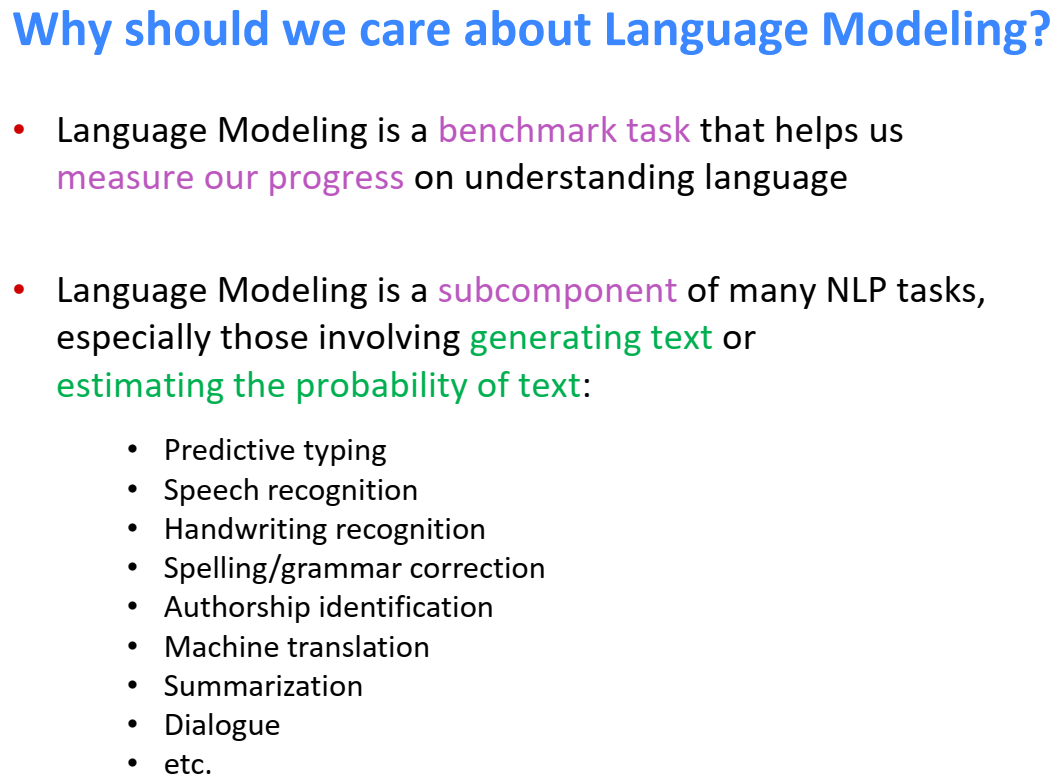